# <b>IFI 8420 - Assignment 3</b>
### Team 5
Mina Carbajal, Carmen Morales-Mier, Gaayathri Rayapaneni, Ignatius Jonathan Sugijono

<hr>

#### Installing all the requirement packages

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

#### Downloading CreditCard CSV data

In [11]:
credit_df = pd.read_csv('CreditCard.csv')
print(credit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB
None


<hr>

### <b>Section 1</b> - CreditCard data set
##### <u>Section Code Split</u>
<ul>
    <li>Mina - A, B, C</li>
    <li>Carmen - </li>
    <li>Gaayathri - G, H </li>
    <li>Jonathan - D, E, F</li>   
</ul>

#### Summary stat for all the variables in the CreditCard data. (<b>A</b>)

In [12]:
credit_df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


#### Getting data with ages over 18 for the analysis. (<b>B</b>)

In [16]:
credit_18_df = credit_df[credit_df['age'] > 18].copy()
credit_18_df['card'] = credit_18_df['card'].apply(lambda x: 1 if x == 'yes' else 0)
credit_18_df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#### Plot of <u>income</u> vs. <u>reports</u>. (<b>C</b>)

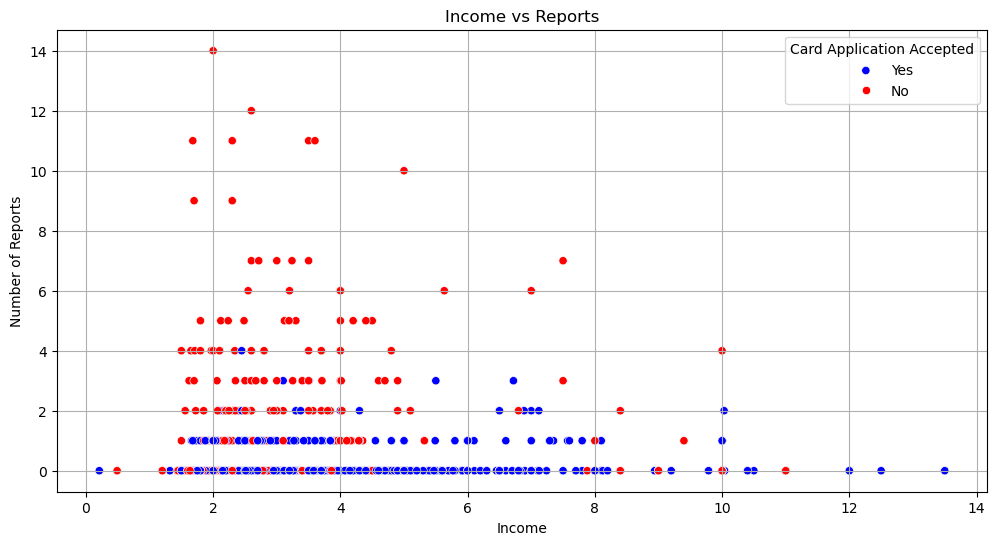

In [18]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=credit_18_df,
    x='income',
    y='reports',
    hue='card',
    palette={1: 'blue', 0: 'red'}
)

plt.title('Income vs Reports')
plt.xlabel('Income')
plt.ylabel('Number of Reports')
plt.legend(title='Card Application Accepted', labels=['Yes', 'No'])
plt.grid(True)
plt.show()

#### Boxplot of <u>income</u> as a function of card acceptance status and of <u>reports</u> as a function of card acceptance status. (<b>D</b>)

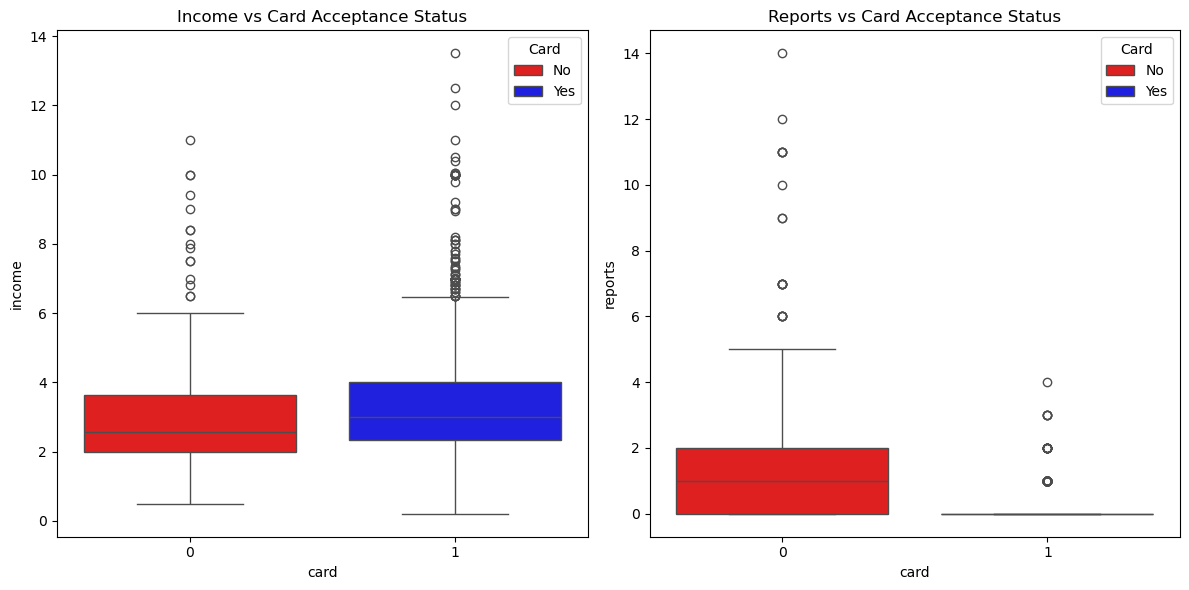

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='card', y='income', data=credit_18_df, hue='card', palette={1: 'blue', 0: 'red'})
plt.title('Income vs Card Acceptance Status')

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No', 'Yes'], title='Card', loc='upper right')

plt.subplot(1, 2, 2)
sns.boxplot(x='card', y='reports', data=credit_18_df, hue='card', palette={1: 'blue', 0: 'red'})
plt.title('Reports vs Card Acceptance Status')

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No', 'Yes'], title='Card', loc='upper right')

plt.tight_layout()
plt.show()

#### Histograms for the predictors. (<b>E</b>)

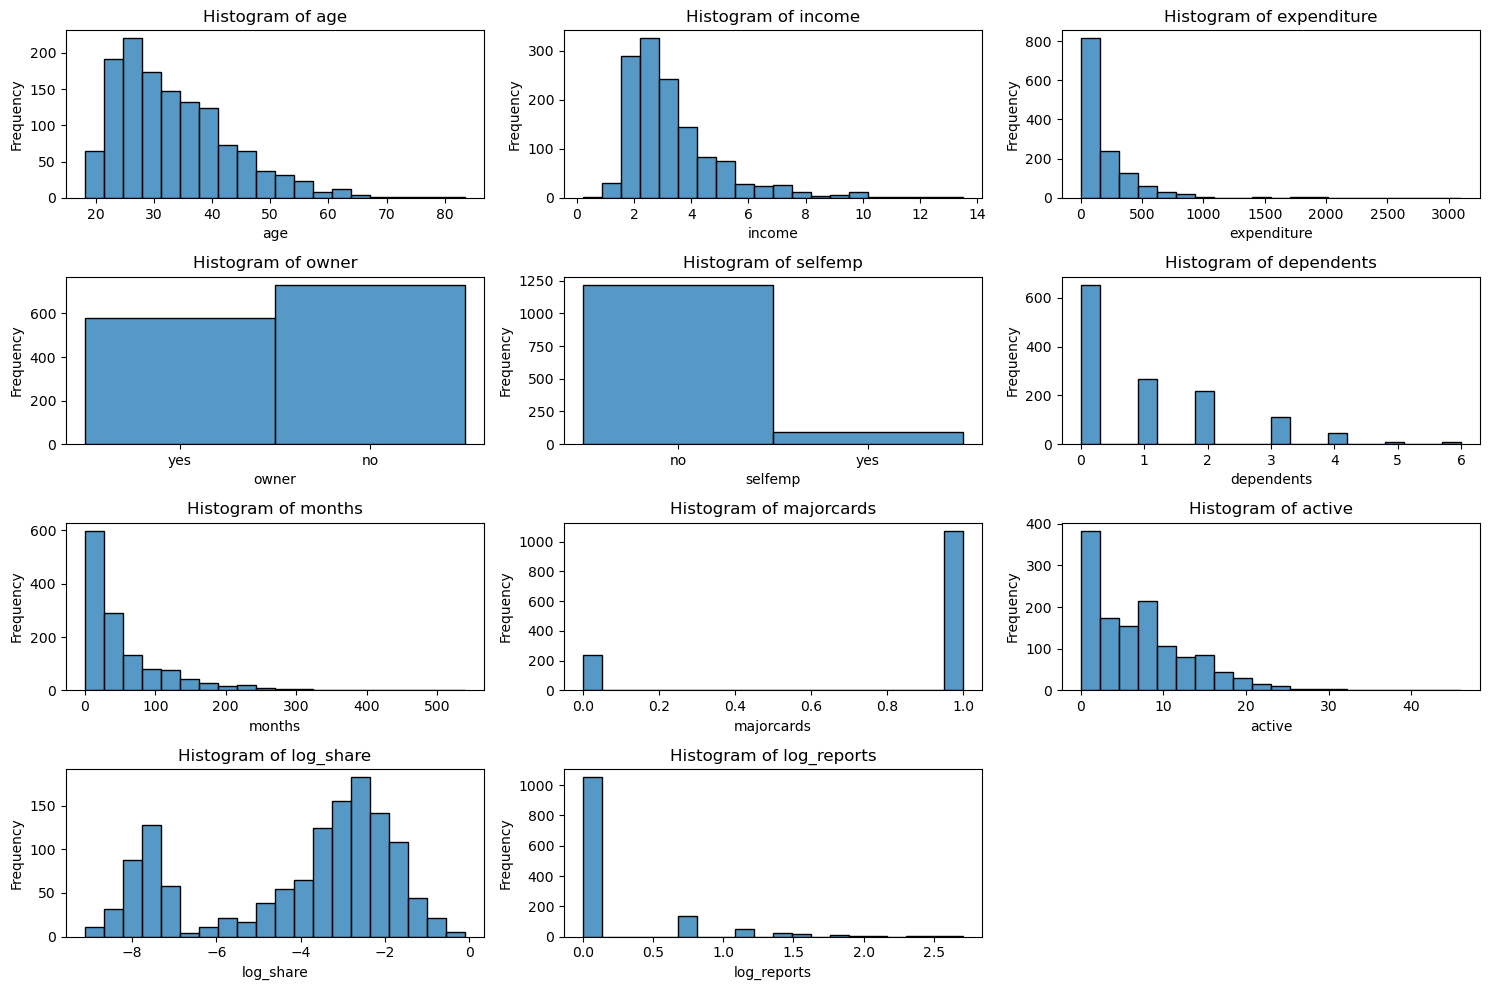

In [39]:
credit_18_df['log_share'] = np.log(credit_18_df['share'])
credit_18_df['log_reports'] = np.log(credit_18_df['reports'] + 1)

predictors = credit_18_df.drop(columns=['card', 'share', 'reports']).columns.tolist()

plt.figure(figsize=(15, 10))

for i, predictor in enumerate(predictors, 1):
    plt.subplot((len(predictors) + 2) // 3, 3, i)
    sns.histplot(credit_18_df[predictor].dropna(), bins=20)
    plt.title(f'Histogram of {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Using Logistic Regression with variables 2 to 8 determine which of the predictors influence the probability that an application is accepted + summary of the model. (<b>F</b>)

In [41]:
df_logreg = credit_df.copy()

df_logreg['log_share'] = np.log(df_logreg['share'])
df_logreg['log_reports'] = np.log(df_logreg['reports'] + 1)
df_logreg = df_logreg.drop(columns=['share', 'reports'])

pd.set_option('future.no_silent_downcasting', True)
df_logreg = df_logreg.replace({'yes': 1, 'no': 0})
df_logreg = df_logreg.infer_objects(copy=False)

logreg = LogisticRegression()
scaler = StandardScaler()

X = df_logreg[['log_reports','income','age','owner','dependents','months','log_share']]
y = df_logreg['card']

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

X_sm = sm.add_constant(X)

logit_model = sm.Logit(y, X_sm).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.053042
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                   card   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            7
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.9004
Time:                        19:27:07   Log-Likelihood:                -69.963
converged:                       True   LL-Null:                       -702.28
Covariance Type:            nonrobust   LLR p-value:                7.398e-269
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.4906      3.675      5.848      0.000      14.288      28.693
log_reports    -2.9063   

#### Converting the predicted probabilities into class labels + computing the confusion matrix and overall fraction of correct predictions. (<b>G</b>)

In [45]:
# Convert predicted probabilities into class labels
y_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_class = (y_prob >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix (G):\n", cm)

# Overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy (G):", accuracy)

Confusion Matrix (G):
 [[ 89   1]
 [  9 297]]
Accuracy (G): 0.9747474747474747


#### Fitting the model using a training data for observations 1 to 1000 + computing the confusion matrix and overall fraction of correct predictions for the test data. (<b>H</b>)

In [48]:
train_data = df_logreg.iloc[:1000]
test_data = df_logreg.iloc[1000:]

X_train_H = train_data[['log_reports','income','age','owner','dependents','months','log_share']]
y_train_H = train_data['card']

X_test_H = test_data[['log_reports','income','age','owner','dependents','months','log_share']]
y_test_H = test_data['card']

X_train_H_scaled = scaler.fit_transform(X_train_H)
X_test_H_scaled = scaler.transform(X_test_H)

logreg_H = LogisticRegression()
logreg_H.fit(X_train_H_scaled, y_train_H)

y_prob_H = logreg_H.predict_proba(X_test_H_scaled)[:, 1]
y_pred_H = (y_prob_H >= 0.5).astype(int)

cm_H = confusion_matrix(y_test_H, y_pred_H)
print("Confusion Matrix (H):\n", cm_H)

accuracy_H = accuracy_score(y_test_H, y_pred_H)
print("Accuracy (H):", accuracy_H)

Confusion Matrix (H):
 [[ 73   2]
 [  7 237]]
Accuracy (H): 0.9717868338557993


#### Applying Discriminant Analysis (LDA), Nearest-Neighbors, Naïve Bayes in the training and test data + model performance metrics. (<b>I</b>)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "LDA": LinearDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB()
}

performance = {}

for name, model in models.items():
# Train the model
    model.fit(X_train_H_scaled, y_train_H)
# Predictions
    y_pred = model.predict(X_test_H_scaled)
# Store performance metrics
    performance[name] = {
        "Accuracy": accuracy_score(y_test_H, y_pred),
        "Confusion Matrix": confusion_matrix(y_test_H, y_pred),
        "Classification Report": classification_report(y_test_H, y_pred, output_dict=True)
    }
df_results = pd.DataFrame({
    "Model": list(performance.keys()),
    "Accuracy": [performance[model]["Accuracy"] for model in performance]
})
print(df_results)

         Model  Accuracy
0          LDA  0.968652
1          KNN  0.949843
2  Naïve Bayes  0.971787


#### Comparison + final model selection and validation of the models from (H) and (I), <i>written in Python</i>. (<b>J</b>)

In [54]:
comparison_data = {
    "Model": ["LDA", "Naïve Bayes", "KNN"],
    "Accuracy": [
        performance["LDA"]["Accuracy"],
        performance["Naïve Bayes"]["Accuracy"],
        performance["KNN"]["Accuracy"]
    ],
    "Precision (Default=1)": [
        performance["LDA"]["Classification Report"]["1"]["precision"],
        performance["Naïve Bayes"]["Classification Report"]["1"]["precision"],
        performance["KNN"]["Classification Report"]["1"]["precision"]
    ],
    "Recall (Default=1)": [
        performance["LDA"]["Classification Report"]["1"]["recall"],
        performance["Naïve Bayes"]["Classification Report"]["1"]["recall"],
        performance["KNN"]["Classification Report"]["1"]["recall"]
    ],
    "F1-Score (Default=1)": [
        performance["LDA"]["Classification Report"]["1"]["f1-score"],
        performance["Naïve Bayes"]["Classification Report"]["1"]["f1-score"],
        performance["KNN"]["Classification Report"]["1"]["f1-score"]
    ]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Print results
print(comparison_df)

         Model  Accuracy  Precision (Default=1)  Recall (Default=1)  \
0          LDA  0.968652               1.000000            0.959016   
1  Naïve Bayes  0.971787               0.991632            0.971311   
2          KNN  0.949843               0.963415            0.971311   

   F1-Score (Default=1)  
0              0.979079  
1              0.981366  
2              0.967347  


In [66]:
nb_accuracy = performance["Naïve Bayes"]["Accuracy"]
nb_f1_score = performance["Naïve Bayes"]["Classification Report"]["1"]["f1-score"]

lda_accuracy = performance["LDA"]["Accuracy"]
lda_recall = performance["LDA"]["Classification Report"]["1"]["recall"]

knn_accuracy = performance["KNN"]["Accuracy"]

print(f"""Based on the model evaluation results, Naïve Bayes was the best-performing model for predicting credit card application acceptance. 
It achieved the highest accuracy ({nb_accuracy:.4f}) and the best F1-Score ({nb_f1_score:.4f}), 
which helps maintain a strong balance between precision and recall. 
Not only does it correctly identify approved applications, but it also minimizes false rejections, 
making it a highly reliable classifier.

Although LDA performed well with competitive accuracy ({lda_accuracy:.4f}), its recall ({lda_recall:.4f}) 
was slightly lower, meaning it may not capture all approved applications as effectively as Naïve Bayes. 
While KNN can handle complex decision boundaries, it had the lowest accuracy ({knn_accuracy:.4f}) 
among the models evaluated, making it less effective in distinguishing between approved and rejected applications.

Naïve Bayes performs well because it assumes features are independent, allowing it to quickly calculate probabilities and classify data accurately, even with large datasets. It is highly effective for credit assessments that require fast and precise decisions. However, its accuracy may drop if predictor variables are strongly related, which should be considered for future improvements.

Overall, Naïve Bayes is the best model due to its accuracy, speed, and efficiency, maintaining a strong balance 
between precision and recall. 
Its reliable credit approval predictions help financial institutions make faster, data-driven decisions 
while reducing errors in approvals and rejections.""")

Based on the model evaluation results, Naïve Bayes was the best-performing model for predicting credit card application acceptance. 
It achieved the highest accuracy (0.9718) and the best F1-Score (0.9814), 
which helps maintain a strong balance between precision and recall. 
Not only does it correctly identify approved applications, but it also minimizes false rejections, 
making it a highly reliable classifier.

Although LDA performed well with competitive accuracy (0.9687), its recall (0.9590) 
was slightly lower, meaning it may not capture all approved applications as effectively as Naïve Bayes. 
While KNN can handle complex decision boundaries, it had the lowest accuracy (0.9498) 
among the models evaluated, making it less effective in distinguishing between approved and rejected applications.

Naïve Bayes performs well because it assumes features are independent, allowing it to quickly calculate probabilities and classify data accurately, even with large datasets. It is highly ef